In [80]:
import pandas as pd 
import matplotlib.pyplot as plt
import psycopg2
import numpy as np
db = {
    "database":"lavadurian_db2",
    "host":"127.0.0.1",
    "user":"postgres",
    "password":"apisit250",
    "port":"5432"
}
con = psycopg2.connect(**db)
cur = con.cursor()

plt.rcParams['font.family'] = 'tahoma'

def mapping(index, choice):
    for i in choice:
        if index == i[0]:
            return i[1]

In [81]:
table = 'shopping_orderitem'
col =  "SELECT COLUMN_NAME FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = '{0}' ORDER BY ORDINAL_POSITION;".format(table)
cur.execute(col)
columns_1 = ['order_'+i[0] for i in cur.fetchall()]

col =  "SELECT COLUMN_NAME FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = '{0}' ORDER BY ORDINAL_POSITION;".format('store_product')
cur.execute(col)
columns_2 = ['product_'+i[0] for i in cur.fetchall()]

# Table Query
query = "SELECT * FROM {0} INNER JOIN store_product ON shopping_orderitem.product_id = store_product.id".format(table)
cur.execute(query)
# DataFrame
store_product = pd.DataFrame(cur.fetchall(), columns=columns_1+columns_2)

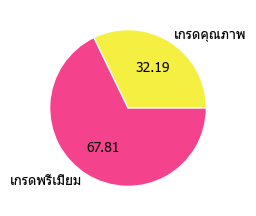

In [82]:

GRADE_CHOICES = (
    (1, 'เกรดคุณภาพ'),
    (2, 'เกรดพรีเมี่ยม'),
)

plt.style.use('_mpl-gallery-nogrid')

# make data
pie_plot = store_product.sort_values('product_grade')

x = [len(pie_plot.loc[(pie_plot['product_grade']==i)]) for i in pie_plot['product_grade'].unique()]
labels = [mapping(i, choice=GRADE_CHOICES) for i in pie_plot['product_grade'].unique()]
colors = ["#f5ef42", "#f5428d"]

# plot
plt.pie(x, colors=colors,  autopct='%.2f',
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=False, labels=labels)

plt.show()

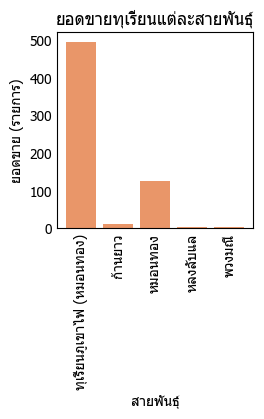

In [83]:
# make data:
type = (
    (1, 'ทุเรียนภูเขาไฟ (หมอนทอง)'),
    (2, 'ก้านยาว'),
    (3, 'หมอนทอง'),
    (4, 'ชะนี'),
    (5, 'กระดุม'),
    (6, 'หลงลับแล'),
    (7, 'พวงมณี'),
)


bar_plot = store_product.sort_values('product_gene')
x = [mapping(i, choice=type) for i in bar_plot['product_gene'].unique()]
y = [len(bar_plot.loc[(bar_plot['product_gene']==i)]) for i in bar_plot['product_gene'].unique()]

# plot
plt.title("ยอดขายทุเรียนแต่ละสายพันธุ์")
plt.xlabel('สายพันธุ์')
plt.ylabel('ยอดขาย (รายการ)')
plt.xticks(rotation=90)
plt.bar(x, y,color="#E99669")
plt.show()



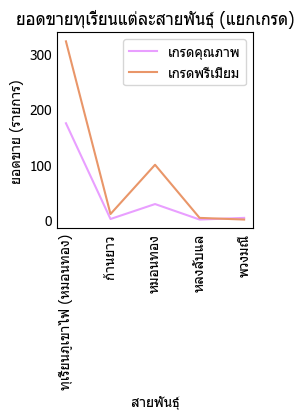

In [84]:

bar_plot = store_product.sort_values('product_gene')
x = [mapping(i, choice=type) for i in bar_plot['product_gene'].unique()]

y = [len(bar_plot.loc[(bar_plot['product_gene'] == i) & (
    bar_plot['product_grade'] == 1)]) for i in bar_plot['product_gene'].unique()]
plt.plot(x, y, color="#E99fff", label=mapping(1, GRADE_CHOICES))

y = [len(bar_plot.loc[(bar_plot['product_gene'] == i) & (
    bar_plot['product_grade'] == 2)]) for i in bar_plot['product_gene'].unique()]
plt.plot(x, y, color="#E99669", label=mapping(2, GRADE_CHOICES))

# plot
plt.xticks(rotation=90)
plt.title("ยอดขายทุเรียนแต่ละสายพันธุ์ (แยกเกรด)")
plt.xlabel('สายพันธุ์')
plt.ylabel('ยอดขาย (รายการ)')
plt.legend(loc='best')

plt.show()